# Introduction to ROOT

In this notebook, we explore some of the more basic features of root and get familiar with the syntax of implementing them in PyROOT

### Lets break down some of ROOTs most basic features. We can start with:
* Canvases --- (TCanvas)
* Histograms - (THn)
* Graphs ----- (TGraph)
* Functions -- (TFn)

---

In [ ]:
import ROOT as r #standard python import

In [ ]:
#we can use default python data types here
i = 2
j = 6.8

print(i, j)

# Lets create a 1D histogram 

### Histograms in root are *memory resident*, so take care that you don't eat up all of your RAM creating a 1000x1000x1000 histogram

If you need a huge histogram, think carefully about your data type. Are you just storing a boolean? If so, then you can use a THnC and reduce your memory usage by a LOT

    A TH3D (1 double per bin) of that size will take: 100000x100000x100000x(8 bytes) = 8 GB

    A TH3C (1 byte per bin) of that size will take: 1 GB

documentation: https://root.cern.ch/doc/v608/classTH1.html 

In [ ]:
nBins = 100
xLow = 0
xHigh = 1
h = r.TH1D( # The 'D' here means that each bin contains a double. Other options include I (int) or F (float).
    "h",    # Name of the histogram (used by root internally to access this. Don't create two with the same name.)
    "Example Histogram with a Fancy Title using Latex: #omega/n#pi [#mus]; X-Axis Title; Y-Axis ", # User facing title 
    nBins,       # Number of bins (there is also an under/overflow bin)
    xLow, xHigh) # Range of the lowest bin edge to the highest bin edge

### Now we have a histogram, lets draw it on a canvas

In [ ]:
# c = r.TCanvas()                             # default parameters are fine, or...
c = r.TCanvas("c","First Canvas", 1200,600) # we can specify a name/dimensions

h.Draw() 

c.Draw()

### Nice, we have an empty histogram, now lets fill it with some data

This can be done a number of different ways, but a quick way (since we're using python) is to use numpy's random library

In [ ]:
import numpy as np
randomdata = np.random.random(1000)
weight = 1
for x in randomdata:
    h.Fill(x, weight) # we can fill the histogram with a different weight if we wish. If we leave off this argument, the default is 1

In [ ]:
# lets see how our histogram has changed
c = r.TCanvas("c","First Canvas", 1200,600) # we can specify a name/dimensions

h.Draw() 

c.Draw()

### Maybe we can make this look a little better....

There are a number of different options for styling in root, and you can change the defaults once you find a look you like.

For a g-2 style guide (for official plots anyway), see: https://redmine.fnal.gov/redmine/projects/gm2papers/wiki/StyleGuide_

In [ ]:
# lets see how our histogram has changed
c = r.TCanvas("c","First Canvas", 1200,600) # we can specify a name/dimensions

h.SetLineColor(2) # see: https://root.cern.ch/doc/master/classTColor.html
h.SetFillColorAlpha(45,0.2)
h.Draw() 

c.SetGrid() # we can make the values a little easier to read with a grid
c.SetLogy() # or maybe we think this would look better on a log scale
c.Draw()

### What if our data is more than one dimensional? Well theres a histogram for that too

In [ ]:
h2 = r.TH2D("h2", "A 2D histogram; Ding; Dong", 
           200, 0, 1,  #x-axis
           10, 0, 100) #y-axis, the number of bins and the ranges can be different for each of the axes

randomdata_x = np.random.random(10000)
randomdata_y = np.random.random(10000)

for (x,y) in zip(randomdata_x,randomdata_y):
    h2.Fill(x,y*100)
    
c = r.TCanvas()
h2.Draw("colz") #colz creates a colorscale
c.Draw()

### We can also use a number of different styles to draw this

See: https://root.cern.ch/doc/v608/classTH1.html

In [ ]:
c = r.TCanvas()
h2.Draw("lego2z") #lego creates a 3d plot
c.Draw()

---

# TGraph


Now that we understand how histograms work, we can quickly mention unbinned data formats. These are less useful to us because they quickly become memory intensive, but are important to note. 

In [ ]:
gr = r.TGraph() # no need to initialize the bins, there aren't any
gr.SetTitle("An Example Graph; Wow such label; Many science")

for i in range(len(randomdata_x)):
    gr.SetPoint(i, randomdata_x[i], randomdata_y[i]) #each point has an index as well as the data value

c = r.TCanvas()
gr.Draw()
c.Draw()

In [ ]:
#lets just draw the axes (a) and points (p)

c = r.TCanvas()
gr.Draw("ap")
c.Draw()

---

# Functions

Now lets create a histogram with gaussian data to show off the power of root fits`

In [ ]:
h = r.TH1D("h","Gaussian Fit Example", 100,0,100)
for i in range(10000):
    h.Fill( np.random.normal(30, 5) )

# ^
### See what happens when I create a new histogram with the same name? 

Python is rather forgiving, but a root .C macro will complain here

In [ ]:
c = r.TCanvas()
h.Draw()
c.Draw()

### Now lets create a gaussian function to fit this using the built in TMath 'gaus' function

See: https://root.cern.ch/doc/master/classTF1.html

In [ ]:
func = r.TF1("func", #name of the function
             "gaus", #a string detailing what the function is. This is parsed by ROOT. 
             0,100   #the range in which the function is defined.
            )

In [ ]:
#lets fit the histogram
c = r.TCanvas()
h.Fit(func)
h.Draw()
c.Draw()

### We can also use a TF1 to generate random data using the FillRandom function, this will allow us to show off a more complex fit

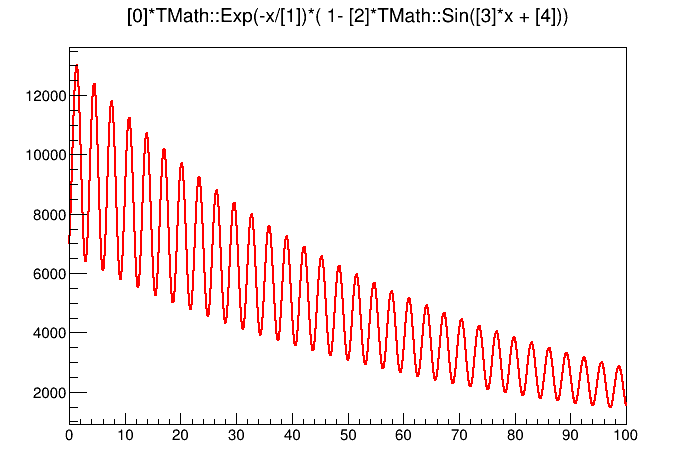

In [27]:
# func2 = r.TF1("func2","[0]+[1]*x+[2]*TMath::Sin([3]*x + [4])",0,100)
func2 = r.TF1("func2","[0]*TMath::Exp(-x/[1])*( 1- [2]*TMath::Sin([3]*x + [4]))",0,100) 
func2.SetParameters(10000,64.4,0.33,2,2)
func2.SetNpx(5000)
c = r.TCanvas()
func2.Draw()
c.Draw()

In [ ]:
h = r.TH1I("h","Example Integer Histogram with Fancy Fit", 1000,0,100)
h.FillRandom("func2", 1000000)

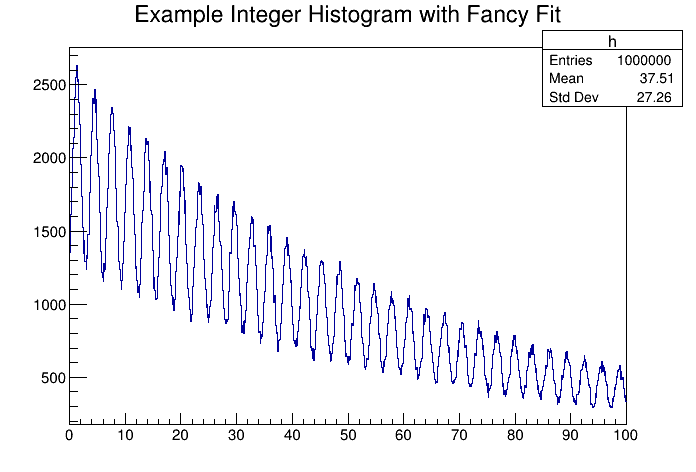

In [19]:
c = r.TCanvas()
h.Draw()
c.Draw()

### Now lets just try fitting right away

 FCN=56622.9 FROM MIGRAD    STATUS=CONVERGED     869 CALLS         870 TOTAL
                     EDM=2.35937e-07    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           1.86125e+03   3.28086e+00   2.22655e-01  -1.27191e-04
   2  p1           6.42089e+01   1.56863e-01   1.06542e-02  -1.18388e-03
   3  p2          -8.17705e-03   1.45803e-03   1.69332e-04   2.87501e-01
   4  p3          -7.71871e-01   5.65348e-03   5.37636e-04  -3.48532e-03
   5  p4           2.05437e+01   2.17776e-01   2.06729e-02   1.96022e-03


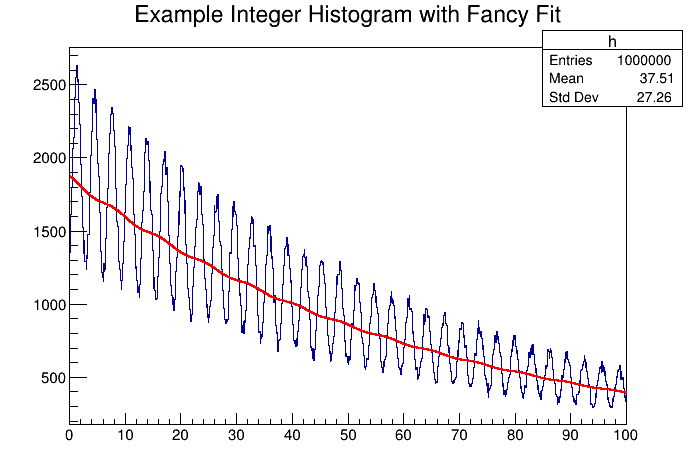

In [20]:
c = r.TCanvas()
h.Fit(func2)
h.Draw()
c.Draw()

### Why didn't that work? Well maybe we need to use some fitting options...

See: https://root.cern.ch/root/htmldoc/guides/users-guide/FittingHistograms.html
The ones I've chosen are:
 - “R” Use the range specified in the function range
 - “E” Perform better errors estimation using the Minos technique
 - “M” Improve fit results, by using the IMPROVE algorithm of TMinuit.

This is my 'default' parameter set, just because its easy to remember (REM sleep...)

 FCN=56622.9 FROM MINOS     STATUS=SUCCESSFUL     64 CALLS         450 TOTAL
                     EDM=1.52853e-07    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           1.86125e+03   3.27991e+00   1.84919e-03  -8.33860e-05
   2  p1           6.42089e+01   1.56819e-01  -6.84743e-05  -8.29803e-04
   3  p2          -8.17726e-03   1.45776e-03   3.24108e-06   2.97759e-02
   4  p3          -7.71872e-01   5.63441e-03   4.48305e-05   3.11537e-01
   5  p4           2.05437e+01   2.17042e-01   2.17042e-01  -3.72181e-03


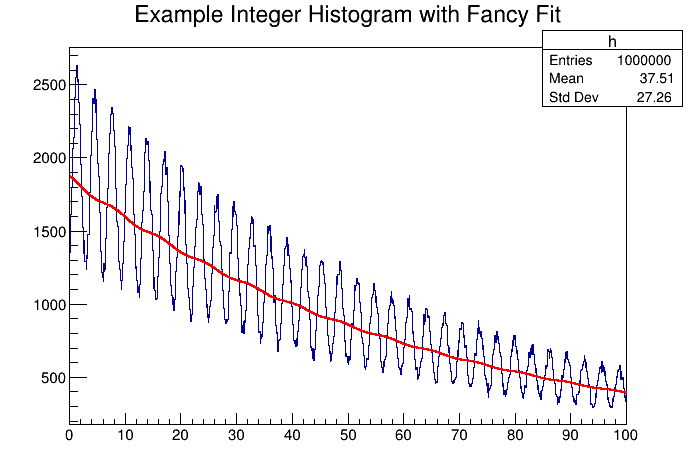

In [21]:
c = r.TCanvas()
h.Fit(func2,"REM")
h.Draw()
c.Draw()

### Well that didn't do it. Perhaps we need a better initial guess?

You can tune parameters by drawing the fit function on top of your histogram without fitting to get close

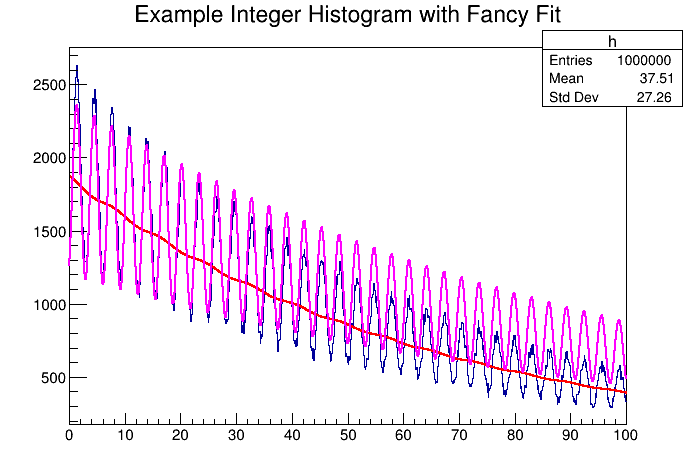

In [25]:
c = r.TCanvas()
func2.SetParameters(1800,100,0.33,2,2)
func2.SetLineColor(6) # to distinguish from the fit we've already done, which becomes embedded in the histogram
h.Draw()
func2.Draw("SAME")
c.Draw()

### Now lets try again!

 FCN=1020.61 FROM MINOS     STATUS=SUCCESSFUL     36 CALLS         396 TOTAL
                     EDM=5.6775e-07    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           1.96655e+03   3.34702e+00  -2.96178e-03   8.20061e-07
   2  p1           6.42654e+01   1.51535e-01   4.86058e-05   1.69444e-05
   3  p2           3.29996e-01   1.36208e-03  -2.86252e-06  -4.11122e-04
   4  p3           1.99975e+00   1.55534e-04   4.18116e-08   1.01231e-02
   5  p4           2.01685e+00   7.16524e-03   7.16524e-03   1.38155e-03


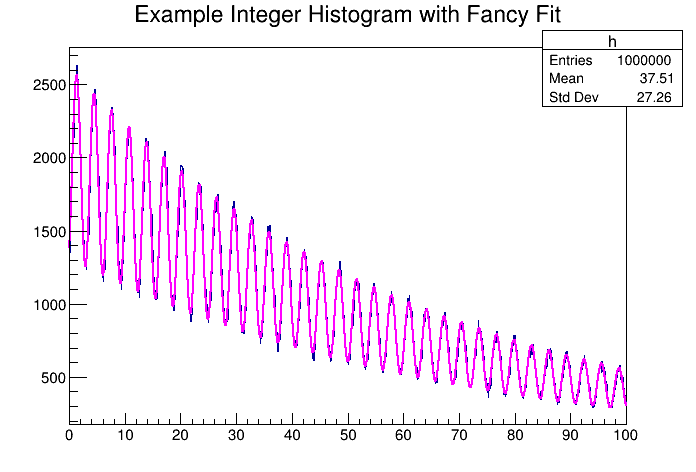

In [26]:
c = r.TCanvas()
func2.SetParameters(2000,100,0.33,2,2)
h.Fit(func2,"REM")
h.Draw()
c.Draw()

### Much better!

---

### Now that we have some basics under our belt, lets look at some real data!

In [29]:
f = r.TFile("gm2offline_ana_22530535_16119.00442.root")

f.cd("farline")
f.ls()

TFile**		gm2offline_ana_22530535_16119.00442.root	
 TFile*		gm2offline_ana_22530535_16119.00442.root	
  TDirectoryFile*		farline	farline (CaloFarlineHistograms) folder
   KEY: TDirectoryFile	calo1;1	calo1
   KEY: TDirectoryFile	calo2;1	calo2
   KEY: TDirectoryFile	calo3;1	calo3
   KEY: TDirectoryFile	calo4;1	calo4
   KEY: TDirectoryFile	calo5;1	calo5
   KEY: TDirectoryFile	calo6;1	calo6
   KEY: TDirectoryFile	calo7;1	calo7
   KEY: TDirectoryFile	calo8;1	calo8
   KEY: TDirectoryFile	calo9;1	calo9
   KEY: TDirectoryFile	calo10;1	calo10
   KEY: TDirectoryFile	calo11;1	calo11
   KEY: TDirectoryFile	calo12;1	calo12
   KEY: TDirectoryFile	calo13;1	calo13
   KEY: TDirectoryFile	calo14;1	calo14
   KEY: TDirectoryFile	calo15;1	calo15
   KEY: TDirectoryFile	calo16;1	calo16
   KEY: TDirectoryFile	calo17;1	calo17
   KEY: TDirectoryFile	calo18;1	calo18
   KEY: TDirectoryFile	calo19;1	calo19
   KEY: TDirectoryFile	calo20;1	calo20
   KEY: TDirectoryFile	calo21;1	calo21
   KEY: TDirectoryFile	calo22;1

In [30]:
h = f.Get("farline/allCaloWiggle")

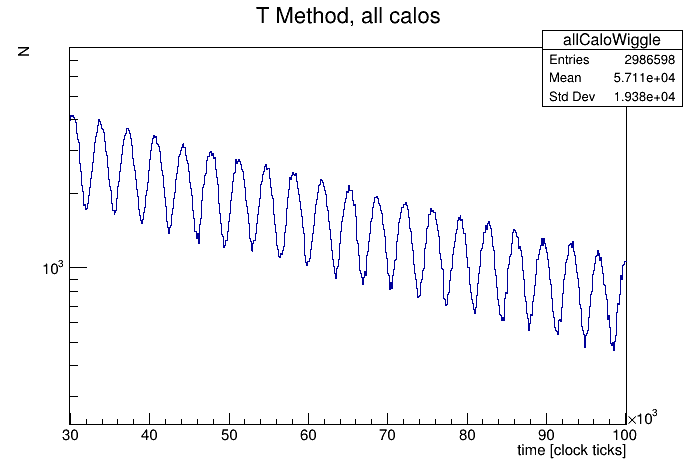

In [32]:
c=r.TCanvas()
h.Draw()
h.GetXaxis().SetRangeUser(30000,100000)
c.SetLogy()
c.Draw()